<a href="https://colab.research.google.com/github/melbingeorge2/Projects/blob/main/Classifying_Solar_Panels_with_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Written by Melbin George**

**Objective**

The primary goal of my Solar Panel Image Classification project, employing the VGG16 convolutional neural network, is to create a dependable and precise model. This model's purpose is to categorize images of solar panels into specific groups, including 'Bird-drop,' 'Clean,' 'Dusty,' 'Electrical-damage,' 'Physical-Damage,' and 'Snow-Covered.' The core aim of this classification system is to facilitate the evaluation of solar panel conditions. By doing so, we can ensure timely maintenance or cleaning procedures are implemented to enhance energy generation efficiency.

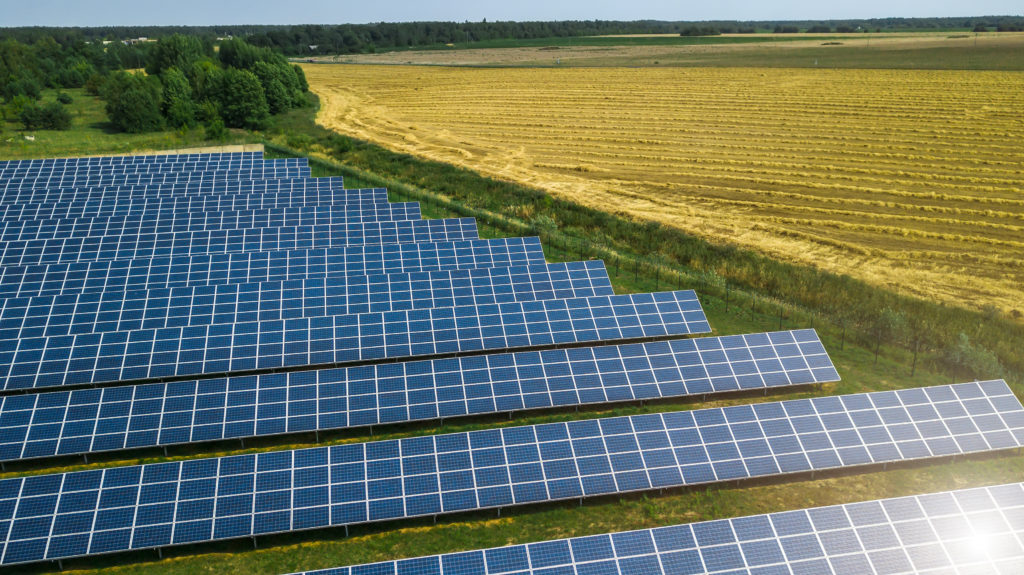

**solar panel Classification Using Pre-train VGG - 16 Using Transfer Learning and Fine Tuning**

The difference between Transfer Learning and Fine-Tuning is this:



* In Transfer Learning, we only change the weights of the new classification layers we've added. We don't touch the weights of the original VGG16 model.
* In Fine-Tuning, we change the weights of the new classification layers we've added, and we might also make adjustments to some or all of the layers in the VGG16 model.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
BATCH_SIZE = 64
image_size=(244,244)

**Load Datasets**

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Solar panel'


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset='training',
  image_size=image_size,
  batch_size=32,
  seed=42,
  shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset='validation',
  image_size=image_size,
  batch_size=32,
  seed=42,
  shuffle=True)


Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

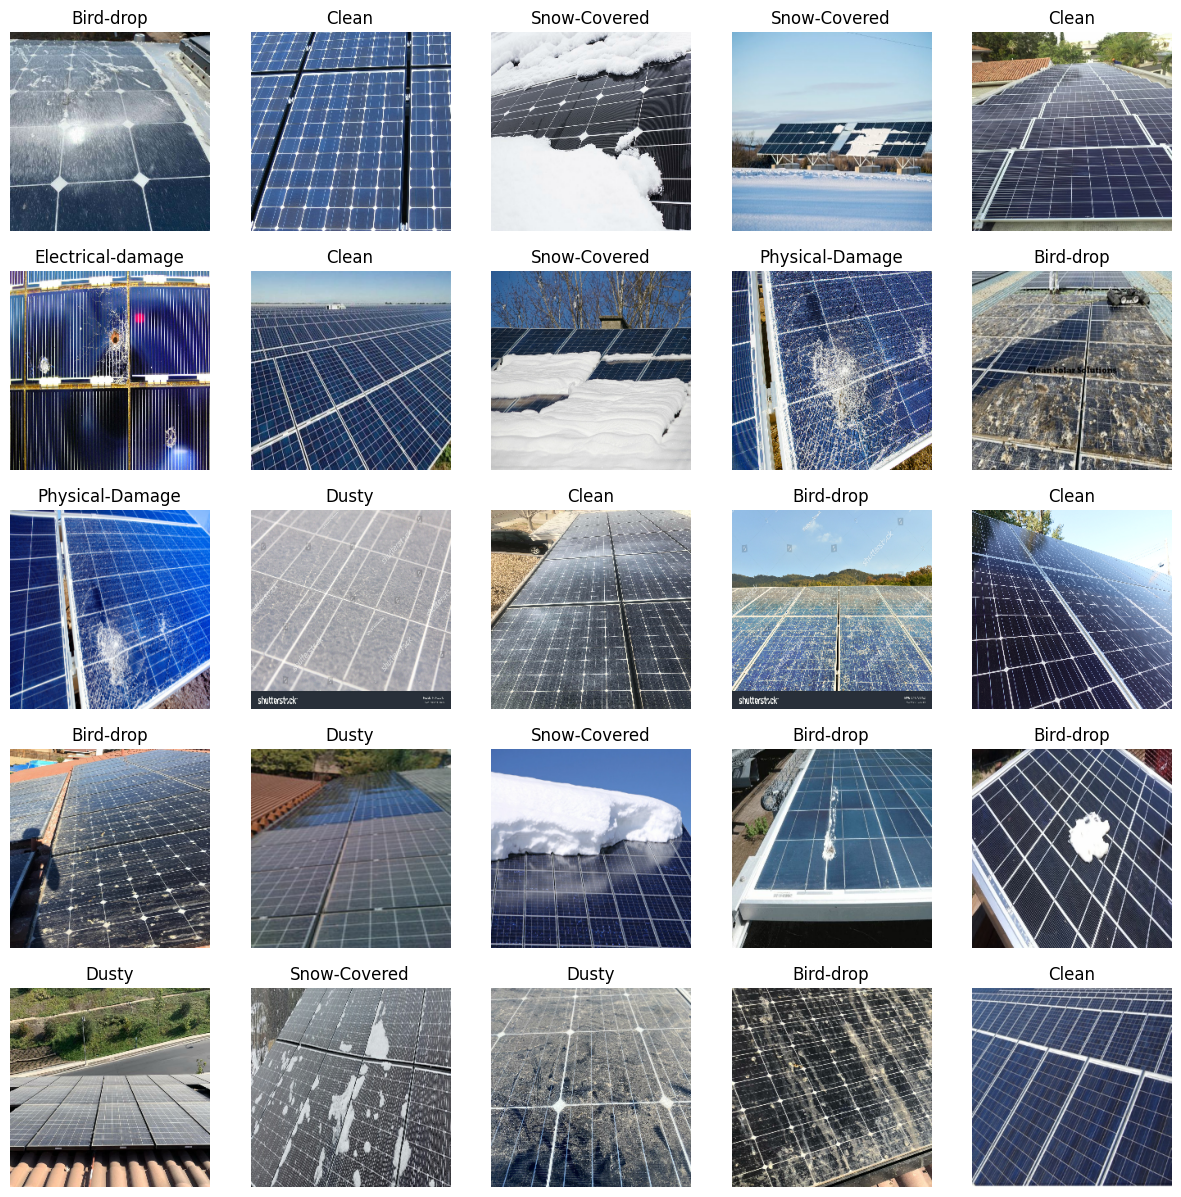

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
base_model=tf.keras.applications.VGG16(include_top=False,
                                       weights='imagenet',
                                       input_shape=(244,244,3))

base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
inputs=tf.keras.Input(shape=(244,244,3))
X=tf.keras.applications.vgg16.preprocess_input(inputs)
X=base_model(X,training=False)
X=tf.keras.layers.GlobalAveragePooling2D()(X)
X=tf.keras.layers.Dropout(0.3)(X)
outputs=tf.keras.layers.Dense(90)(X)
model=tf.keras.Model(inputs,outputs)


In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_ds,validation_data=test_ds,epochs=5,
          callbacks=[
              tf.keras.callbacks.EarlyStopping(monitor='test_ds',
                                               min_delta=1e-2,
                                               patience=3,
                                               verbose=1,
                                               restore_best_weights=True)])

Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 9.0643 - accuracy: 0.1229 

23/23 [==============================] - 741s 32s/step - loss: 9.0643 - accuracy: 0.1229 - val_loss: 4.8304 - val_accuracy: 0.2147
Epoch 2/5
23/23 [==============================] - ETA: 0s - loss: 5.3524 - accuracy: 0.2768 

23/23 [==============================] - 677s 29s/step - loss: 5.3524 - accuracy: 0.2768 - val_loss: 3.3727 - val_accuracy: 0.3107
Epoch 3/5
23/23 [==============================] - ETA: 0s - loss: 3.7174 - accuracy: 0.3686 

23/23 [==============================] - 671s 29s/step - loss: 3.7174 - accuracy: 0.3686 - val_loss: 2.7222 - val_accuracy: 0.4068
Epoch 4/5
23/23 [==============================] - ETA: 0s - loss: 3.0208 - accuracy: 0.4435 

23/23 [==============================] - 668s 29s/step - loss: 3.0208 - accuracy: 0.4435 - val_loss: 2.3780 - val_accuracy: 0.4407
Epoch 5/5
23/23 [==============================] - ETA: 0s - loss: 2.4420 - accuracy: 0.5085 

23/23 [==============================] - 672s 29s/step - loss: 2.4420 - accuracy: 0.5085 - val_loss: 1.9469 - val_accuracy: 0.4972


In [ ]:
# fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
r=model.fit(train_ds,validation_data=test_ds,epochs=5,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    min_delta=1e-2,
                    patience=3,
                    verbose=1)])

Epoch 1/5
23/23 [==============================] - 769s 33s/step - loss: 1.6594 - accuracy: 0.5452 - val_loss: 1.0015 - val_accuracy: 0.6441
Epoch 2/5
23/23 [==============================] - 752s 33s/step - loss: 0.5885 - accuracy: 0.8093 - val_loss: 0.7969 - val_accuracy: 0.7910
Epoch 3/5
23/23 [==============================] - 747s 32s/step - loss: 0.2520 - accuracy: 0.9280 - val_loss: 0.4987 - val_accuracy: 0.8418
Epoch 4/5
23/23 [==============================] - 751s 33s/step - loss: 0.1435 - accuracy: 0.9449 - val_loss: 0.4822 - val_accuracy: 0.8418
Epoch 5/5
23/23 [==============================] - 755s 33s/step - loss: 0.1295 - accuracy: 0.9633 - val_loss: 0.5070 - val_accuracy: 0.8588


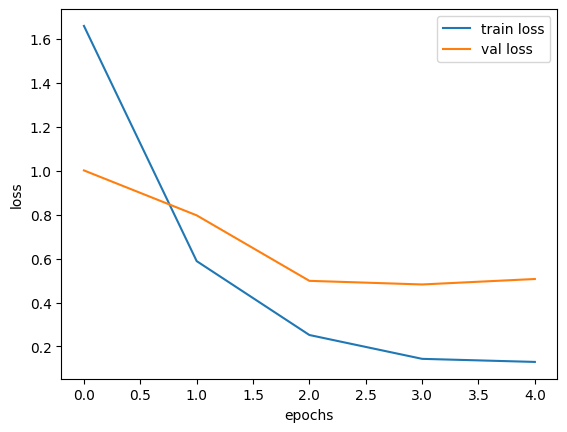

In [ ]:
#loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


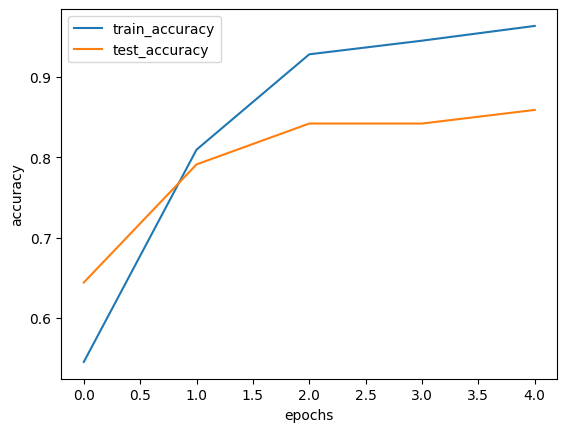

In [ ]:
#accuracy
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='test_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 1s 625ms/step


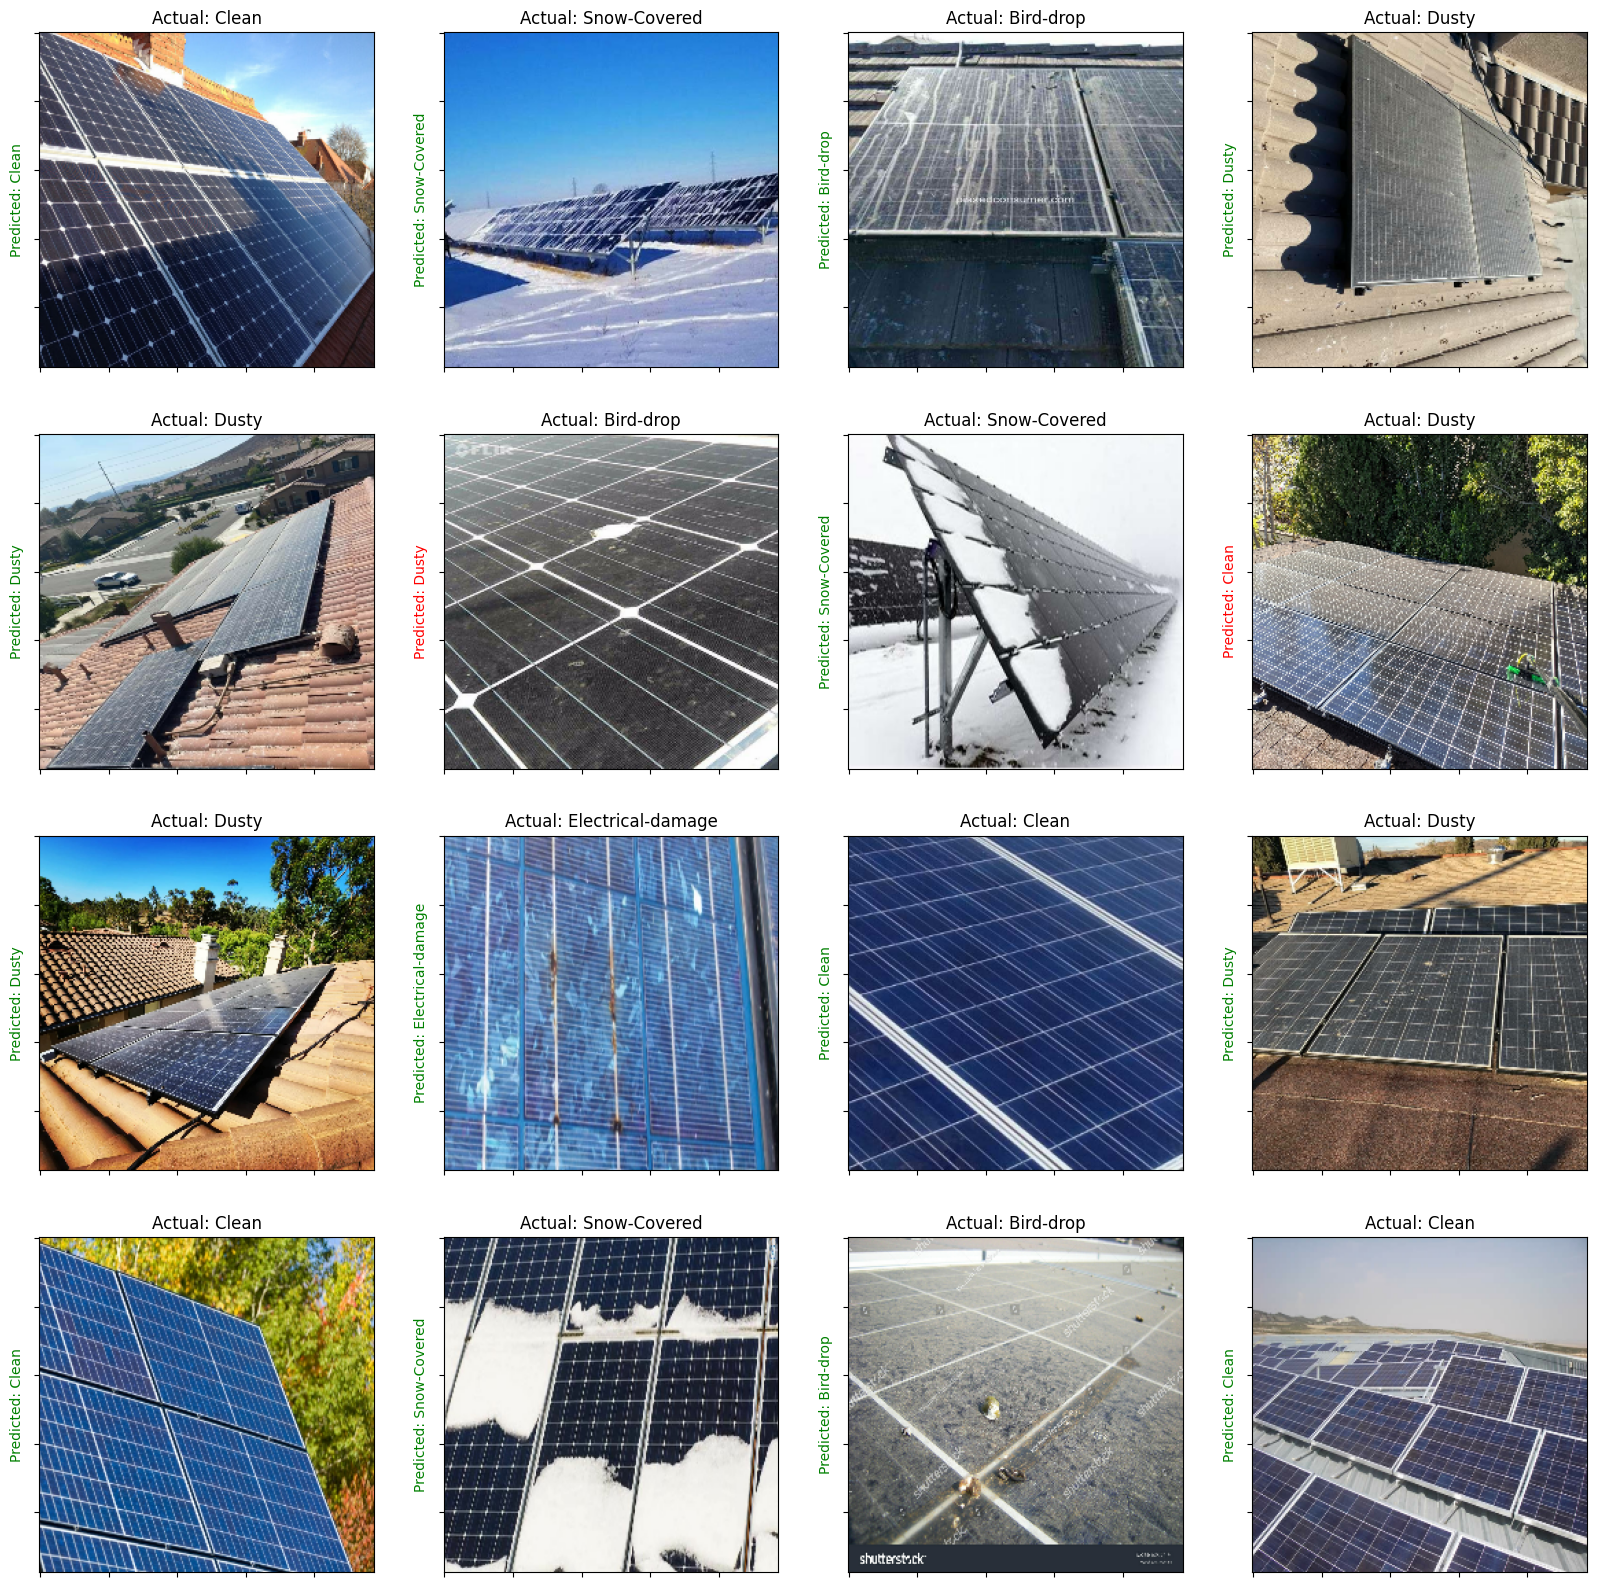

In [ ]:
loss, accuracy = model.evaluate(test_ds)

plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

Sav

In [ ]:
# tf.keras.models.save_model(model,'solar_panel_classification')
tf.keras.models.save_model(model,'my_model2.hdf5')


In [ ]:
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.2 which is incompatible.


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 24.0 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:

%%writefile app.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileuploaderEncoding', False)
st.title('Classifying Solar Panels with VGG16')
st.text('Please enter the URL of the image')

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('/content/my_model2.hdf5')
    return model

with st.spinner('Loading Model into Memory...'):
    model = load_model()

classes = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

def scale(image):
    image = tf.cast(image, tf.float32)
    image /= 255.0
    return tf.image.resize(image, [244, 244])

def decode_img(image):
    img = tf.image.decode_jpeg(image, channels=3)
    img = scale(img)
    return np.expand_dims(img, axis=0)

path = st.text_input('Enter image URL to classify...', '/content/drive/MyDrive/Colab Notebooks/Solar panel/Clean/Clean (102).jpg')

if path is not None:
    content = requests.get(path).content
    st.write('Predicted class:')

    with st.spinner('Classifying....'):
        label = np.argmax(model.predict(decode_img(content)), axis=1)
        st.write(classes[label[0]])
    st.write('')
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying bean image', use_column_width=True)


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-09-17 20:15:32--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.7’

ngrok-stable-linux- 100%[===================>]  13.28M  56.0MB/s    in 0.2s    

2023-09-17 20:15:33 (56.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.7’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run --server.address 0.0.0.0 --server.port 8501 /content/app.py






  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501



In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.128.140:8501

  Stopping...
  Stopping...
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1088, in main
    ctx.exit()
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 692, in exit
    raise Exit(code)
click.exceptions.Exit: 0

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1088, in main
    ctx.exit()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/web/bootstrap.py", line 69, in signal_handler
    server.stop()
  File "/usr/local/lib/python3.10/dist-packa